<a href="https://colab.research.google.com/github/LinOna/cars_data_project/blob/main/Final_of_Car_dataset_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Part-one: Data Wrangling**

NOTE: I have a summary report at the end of the code section that contains my written reports and graphs (pasted as pictures).
Mind the comments on the side of some code cells.

## **Import Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

## **Data Loading**

In [ ]:
#loading a csv file
df_car=pd.read_csv("data.csv")

In [ ]:
df_car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## **Understanding the Dataset**

In [ ]:
#list of columns
df_car.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
#basic information
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
# Summary Statistics
df_car.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
#Missing values
df_car.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


#**Project Tasks**

## **Task_1: Cleanig the Dataset**

### **1.1 Handle Missing Data**

In [ ]:
# Fill missing Engine HP step by step for df_car

#First tries exact Make+Model+Year match → best accuracy.
#Then tries Make+Model → still pretty accurate.
#Then uses Engine Cylinders + Vehicle Size as a broader estimate.
#Finally uses global median HP only for any stubborn cases.

#This hierarchical approach ensures maximum confidence because it uses the most
#specific info first (exact model/year) and only generalizes when needed.



# Check how many missing values initially
print("Missing Engine HP before filling:", df_car['Engine HP'].isna().sum())

# Fill missing Engine HP using median from the most specific group: Make + Model + Year
df_car['Engine HP'] = df_car.groupby(['Make', 'Model', 'Year'])['Engine HP']\
                           .transform(lambda x: x.fillna(x.median()))

# Fill remaining missing values using median from Make + Model
df_car['Engine HP'] = df_car.groupby(['Make', 'Model'])['Engine HP']\
                           .transform(lambda x: x.fillna(x.median()))

# Fill remaining missing values using Engine Cylinders + Vehicle Size
df_car['Engine HP'] = df_car.groupby(['Engine Cylinders', 'Vehicle Size'])['Engine HP']\
                          .transform(lambda x: x.fillna(x.median()))

# Final fallback: fill any remaining NaNs with the overall median Engine HP
df_car['Engine HP'] = df_car['Engine HP'].fillna(df_car['Engine HP'].median())

# Verify result
print("Missing Engine HP after filling:", df_car['Engine HP'].isna().sum())


Missing Engine HP before filling: 69
Missing Engine HP after filling: 0


In [ ]:
# Fill missing Engine Cylinders step by step

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Select features you think predict Engine Cylinders
features = ['Engine HP', 'Engine Fuel Type', 'Make', 'Model', 'Year',
            'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']

# Convert categorical variables to numeric with one-hot encoding or label encoding
df_model = df_car[features + ['Engine Cylinders']].copy()

# One-hot encode categorical features
df_model = pd.get_dummies(df_model, columns=['Engine Fuel Type', 'Make', 'Model', 'Transmission Type',
                                             'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], drop_first=True)

# Split data into training (non-missing Engine Cylinders) and data to predict (missing Engine Cylinders)
train_data = df_model[df_model['Engine Cylinders'].notnull()]
predict_data = df_model[df_model['Engine Cylinders'].isnull()]

X_train = train_data.drop('Engine Cylinders', axis=1)
y_train = train_data['Engine Cylinders'].astype(int)  # Ensure integer labels

X_predict = predict_data.drop('Engine Cylinders', axis=1)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict missing Engine Cylinders
predicted_cylinders = rf.predict(X_predict)

# Fill missing values in original dataframe
df_car.loc[df_car['Engine Cylinders'].isnull(), 'Engine Cylinders'] = predicted_cylinders


In [ ]:
#Missing values
df_car.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


Note: The next lines are just to check if there is a way to consitently predict the number of doors using different measures. I leave the code here, however, I did not use any of this as for me there was no sufficiently confident way to predict number of doors. Since it is only 6 rows, I decided to drop them.

In [ ]:
import pandas as pd

# Calculate the mode (most common number of doors) per Vehicle Style
style_doors_mode = df_car.groupby('Vehicle Style')['Number of Doors'] \
                        .agg(lambda x: x.mode().iat[0] if not x.mode().empty else None)

# Map each row's Vehicle Style to the typical number of doors
df_car['Typical Doors by Style'] = df_car['Vehicle Style'].map(style_doors_mode)

# Find rows where Number of Doors is inconsistent with typical doors for that style
inconsistent_rows = df_car[df_car['Number of Doors'] != df_car['Typical Doors by Style']]

print(f"Number of inconsistent rows: {len(inconsistent_rows)}")
print(inconsistent_rows[['Vehicle Style', 'Number of Doors', 'Typical Doors by Style']])


Number of inconsistent rows: 338
           Vehicle Style  Number of Doors  Typical Doors by Style
1331       Cargo Minivan              3.0                     4.0
1332   Passenger Minivan              3.0                     4.0
1333   Passenger Minivan              3.0                     4.0
1334   Passenger Minivan              3.0                     4.0
1335   Passenger Minivan              3.0                     4.0
...                  ...              ...                     ...
11426  Passenger Minivan              3.0                     4.0
11427      Cargo Minivan              3.0                     4.0
11428      Cargo Minivan              3.0                     4.0
11429      Cargo Minivan              3.0                     4.0
11433  Passenger Minivan              3.0                     4.0

[338 rows x 3 columns]


In [ ]:
# Mode number of doors by Vehicle Style and Model
style_model_doors_mode = df_car.groupby(['Vehicle Style', 'Model'])['Number of Doors'] \
                              .agg(lambda x: x.mode().iat[0] if not x.mode().empty else None)

# Create a helper function to map each row to typical number of doors by style and model
def get_typical_doors(row):
    try:
        return style_model_doors_mode.loc[(row['Vehicle Style'], row['Model'])]
    except KeyError:
        return None  # fallback if no mode found

df_car['Typical Doors by Style+Model'] = df_car.apply(get_typical_doors, axis=1)

# Find inconsistencies with combined style+model info
inconsistent_rows_2 = df_car[df_car['Number of Doors'] != df_car['Typical Doors by Style+Model']]

print(f"Number of inconsistent rows combining Style and Model: {len(inconsistent_rows_2)}")
print(inconsistent_rows_2[['Vehicle Style', 'Model', 'Number of Doors', 'Typical Doors by Style+Model']])


Number of inconsistent rows combining Style and Model: 56
             Vehicle Style            Model  Number of Doors  \
1684   Extended Cab Pickup  B-Series Pickup              2.0   
1685   Extended Cab Pickup  B-Series Pickup              2.0   
1686   Extended Cab Pickup  B-Series Pickup              2.0   
1687   Extended Cab Pickup  B-Series Pickup              2.0   
1690   Extended Cab Pickup  B-Series Pickup              2.0   
1693   Extended Cab Pickup  B-Series Pickup              2.0   
1701   Extended Cab Pickup  B-Series Pickup              2.0   
1702   Extended Cab Pickup  B-Series Pickup              2.0   
1703   Extended Cab Pickup  B-Series Pickup              2.0   
1709   Extended Cab Pickup  B-Series Pickup              2.0   
1711   Extended Cab Pickup  B-Series Pickup              2.0   
1721   Extended Cab Pickup  B-Series Pickup              2.0   
1737   Extended Cab Pickup         B-Series              4.0   
1741   Extended Cab Pickup         B-Series   

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Compute mode number of doors grouped by multiple columns
multi_mode = df_car.groupby(['Vehicle Style', 'Model', 'Make', 'Year'])['Number of Doors'] \
                  .agg(lambda x: x.mode().iat[0] if not x.mode().empty else np.nan)

# Step 2: Define a function to fetch typical door count for each row
def get_typical_doors_multi(row):
    try:
        val = multi_mode.loc[(row['Vehicle Style'], row['Model'], row['Make'], row['Year'])]
        # Convert pd.NA to np.nan explicitly
        return np.nan if pd.isna(val) else val
    except KeyError:
        return np.nan  # fallback to np.nan if no mode found

# Step 3: Apply the function to create a new column
df_car['Typical Doors by Multi'] = df_car.apply(get_typical_doors_multi, axis=1)

# Step 4: Convert both columns to float (np.nan safe)
df_car['Number of Doors'] = pd.to_numeric(df_car['Number of Doors'], errors='coerce')
df_car['Typical Doors by Multi'] = pd.to_numeric(df_car['Typical Doors by Multi'], errors='coerce')

# Step 5: Find inconsistent rows, treating missing typical values as inconsistent
inconsistent_mask = (df_car['Number of Doors'] != df_car['Typical Doors by Multi']) | (df_car['Typical Doors by Multi'].isna())

inconsistent_rows_multi = df_car[inconsistent_mask]

# Step 6: Print results
print(f"Number of inconsistent rows using multi-columns: {len(inconsistent_rows_multi)}")
print(inconsistent_rows_multi[['Vehicle Style', 'Model', 'Make', 'Year', 'Number of Doors', 'Typical Doors by Multi']])


Number of inconsistent rows using multi-columns: 39
             Vehicle Style            Model      Make  Year  Number of Doors  \
1689   Extended Cab Pickup  B-Series Pickup     Mazda  1998              4.0   
1693   Extended Cab Pickup  B-Series Pickup     Mazda  1999              2.0   
1701   Extended Cab Pickup  B-Series Pickup     Mazda  1999              2.0   
1702   Extended Cab Pickup  B-Series Pickup     Mazda  1999              2.0   
1703   Extended Cab Pickup  B-Series Pickup     Mazda  1999              2.0   
1709   Extended Cab Pickup  B-Series Pickup     Mazda  1999              2.0   
1711   Extended Cab Pickup  B-Series Pickup     Mazda  2000              2.0   
1721   Extended Cab Pickup  B-Series Pickup     Mazda  2000              2.0   
1737   Extended Cab Pickup         B-Series     Mazda  2001              4.0   
1741   Extended Cab Pickup         B-Series     Mazda  2001              4.0   
1744   Extended Cab Pickup         B-Series     Mazda  2001         

In [ ]:
# Drop rows where 'Number of Doors' is missing (NaN)
df_car = df_car.dropna(subset=['Number of Doors'])

# Check how many rows remain
print(f"Remaining rows after dropping missing 'Number of Doors': {len(df_car)}")

#Missing values
df_car.isnull().sum()

Remaining rows after dropping missing 'Number of Doors': 11908


,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,3742


In [ ]:
df_car['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [ ]:
df_car['Market Category'].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

In [ ]:
import pandas as pd


# Fill missing values with an empty string (to avoid errors during split)
df_car['Market Category'] = df_car['Market Category'].fillna("")

# Create a set of all unique categories
all_categories = set()

# Loop through each row, split by comma, and add to the set
for entry in df_car['Market Category']:
    categories = [cat.strip() for cat in entry.split(',') if cat.strip() != ""]
    all_categories.update(categories)


# Now we have a set of all unique categories
# Create a new column for each one with 0 or 1
for category in sorted(all_categories):
    df_car[f'Market_{category}'] = df_car['Market Category'].apply(lambda x: int(category in x))


# Optional: Drop the original column
# df = df.drop('Market Category', axis=1)


# Show the updated DataFrame
df_car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,...,Market_Crossover,Market_Diesel,Market_Exotic,Market_Factory Tuner,Market_Flex Fuel,Market_Hatchback,Market_High-Performance,Market_Hybrid,Market_Luxury,Market_Performance
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,0,0,0,1,0,0,1,0,1,1
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,0,0,0,0,0,0,0,0,1,1
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",...,0,0,0,0,0,0,1,0,1,1
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,0,0,0,0,0,0,0,0,1,1
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# 1. Define features to use for prediction
features = ['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders',
            'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Vehicle Size', 'Vehicle Style',
            'highway MPG', 'city mpg', 'Popularity', 'MSRP']

# 2. Check how missing Market Category values are represented
print("Unique Market Category values:")
print(df_car['Market Category'].unique())

# Adjust this line if missing is represented by '' or some other placeholder
missing_mask = df_car['Market Category'].isna() | (df_car['Market Category'] == '')

# 3. Separate known and unknown rows
known_mask = ~missing_mask
unknown_mask = missing_mask

print(f"Rows with known Market Category: {known_mask.sum()}")
print(f"Rows with missing Market Category: {unknown_mask.sum()}")

if unknown_mask.sum() == 0:
    print("No missing Market Category rows to predict. Exiting.")
else:
    # 4. Prepare training data

    # Select columns for multilabel Market Category dummy variables
    market_columns = [col for col in df_car.columns if col.startswith('Market_')]
    print(f"Market dummy columns used as targets: {market_columns}")

    # Make sure these columns exist and contain no missing values in known_mask rows
    assert len(market_columns) > 0, "No Market dummy columns found."

    X_train = df_car.loc[known_mask, features]
    y_train = df_car.loc[known_mask, market_columns].fillna(0).astype(int)

    # 5. Prepare data for prediction
    X_pred = df_car.loc[unknown_mask, features]

    # 6. Define categorical and numeric features
    cat_features = ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
                    'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']
    num_features = [f for f in features if f not in cat_features]

    # 7. Create preprocessing and classifier pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
            ('num', 'passthrough', num_features)
        ])

    clf = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42)))
    ])

    # 8. Fit classifier
    clf.fit(X_train, y_train)

    # 9. Predict missing Market Category booleans
    y_pred_array = clf.predict(X_pred)

    # Convert predictions (ndarray) back to DataFrame to match columns and index
    y_pred = pd.DataFrame(y_pred_array, columns=market_columns, index=X_pred.index)

    # 10. Fill predictions back into dataframe
    df_car.loc[unknown_mask, market_columns] = y_pred

    print("Prediction done, missing Market Category boolean columns filled.")

# Optional: to convert boolean Market columns back to a combined string category (example)
def combine_market_categories(row):
    categories = [col.replace('Market_', '') for col in market_columns if row[col] == 1]
    return ",".join(categories) if categories else pd.NA

if unknown_mask.sum() > 0:
    df_car.loc[unknown_mask, 'Market Category'] = df_car.loc[unknown_mask].apply(combine_market_categories, axis=1)

print("Market Category strings updated for missing rows.")



Unique Market Category values:
['Factory Tuner,Luxury,High-Performance' 'Luxury,Performance'
 'Luxury,High-Performance' 'Luxury' 'Performance' 'Flex Fuel'
 'Flex Fuel,Performance' '' 'Hatchback' 'Hatchback,Luxury,Performance'
 'Hatchback,Luxury' 'Luxury,High-Performance,Hybrid' 'Diesel,Luxury'
 'Hatchback,Performance' 'Hatchback,Factory Tuner,Performance'
 'High-Performance' 'Factory Tuner,High-Performance'
 'Exotic,High-Performance' 'Exotic,Factory Tuner,High-Performance'
 'Factory Tuner,Performance' 'Crossover' 'Exotic,Luxury'
 'Exotic,Luxury,High-Performance' 'Exotic,Luxury,Performance'
 'Factory Tuner,Luxury,Performance' 'Flex Fuel,Luxury' 'Crossover,Luxury'
 'Hatchback,Factory Tuner,Luxury,Performance' 'Crossover,Hatchback'
 'Hybrid' 'Luxury,Performance,Hybrid'
 'Crossover,Luxury,Performance,Hybrid' 'Crossover,Luxury,Performance'
 'Exotic,Factory Tuner,Luxury,High-Performance'
 'Flex Fuel,Luxury,High-Performance' 'Crossover,Flex Fuel' 'Diesel'
 'Hatchback,Diesel' 'Crossover,Luxury

In [ ]:
#Missing values
df_car.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,2274


### **1.2 Data Type Conversion**

In [ ]:
#Convert Engine Cylinders & Doors to nullable int
df_car['Engine Cylinders'] = df_car['Engine Cylinders'].astype('Int64')
df_car['Number of Doors'] = df_car['Number of Doors'].astype('Int64')


In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9430 entries, 0 to 9435
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               9430 non-null   object 
 1   Model              9430 non-null   object 
 2   Year               9430 non-null   int64  
 3   Engine Fuel Type   9430 non-null   object 
 4   Engine HP          9430 non-null   float64
 5   Engine Cylinders   9430 non-null   Int64  
 6   Transmission Type  9430 non-null   object 
 7   Driven_Wheels      9430 non-null   object 
 8   Number of Doors    9430 non-null   Int64  
 9   Market Category    9430 non-null   object 
 10  Vehicle Size       9430 non-null   object 
 11  Vehicle Style      9430 non-null   object 
 12  highway MPG        9430 non-null   int64  
 13  city mpg           9430 non-null   int64  
 14  Popularity         9430 non-null   int64  
 15  MSRP               9430 non-null   int64  
dtypes: Int64(2), float64(1), int6

### **1.3 Filtering Data**

In [ ]:
df_cleaned_filter=df_car.copy()

In [ ]:
df_cleaned_filter = df_cleaned_filter[df_cleaned_filter['Year'] >= 1995]

KeyError: 'Year'

### **1.4 String Operations**

In [ ]:
# Standardize text entries by converting these columns' entries to lowercase
df_cleaned_filter['vehicle style'] = df_cleaned_filter['vehicle style'].fillna('').str.lower()
df_cleaned_filter['market category'] = df_cleaned_filter['market category'].fillna('').str.lower()

/tmp/ipython-input-108-3381095050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_filter['vehicle style'] = df_cleaned_filter['vehicle style'].fillna('').str.lower()
/tmp/ipython-input-108-3381095050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_filter['market category'] = df_cleaned_filter['market category'].fillna('').str.lower()


###**1.5** **Feature** **Engeneering**

In [ ]:
# Create Total MPG (average of city and highway mpg)
df_cleaned_filter['Total MPG'] = (df_cleaned_filter['city mpg'] + df_cleaned_filter['highway MPG']) / 2

In [ ]:
# Create Price per HP (MSRP divided by Engine HP)
df_cleaned_filter['Price per HP'] = df_cleaned_filter['MSRP'] / df_cleaned_filter['Engine HP']

In [ ]:
# Check the new columns
df_cleaned_filter[['city mpg', 'highway MPG', 'Total MPG', 'MSRP', 'Engine HP', 'Price per HP']].head()


KeyError: "['highway MPG', 'Total MPG', 'MSRP', 'Engine HP', 'Price per HP'] not in index"

In [ ]:
df_cleaned_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9063 entries, 0 to 9435
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               9063 non-null   object 
 1   Model              9063 non-null   object 
 2   Year               9063 non-null   int64  
 3   Engine Fuel Type   9063 non-null   object 
 4   Engine HP          9005 non-null   float64
 5   Engine Cylinders   9035 non-null   Int64  
 6   Transmission Type  9063 non-null   object 
 7   Driven_Wheels      9063 non-null   object 
 8   Number of Doors    9057 non-null   Int64  
 9   Market Category    9063 non-null   object 
 10  Vehicle Size       9063 non-null   object 
 11  Vehicle Style      9063 non-null   object 
 12  highway MPG        9063 non-null   int64  
 13  city mpg           9063 non-null   int64  
 14  Popularity         9063 non-null   int64  
 15  MSRP               9063 non-null   int64  
 16  Total MPG          9063 non-n

In [ ]:
# age calculation
df_cleaned_filter['Age'] = 2025 - df_cleaned_filter['Year']

In [ ]:
df_cleaned_filter.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500


### **3. EDA summary statistics**

In [ ]:
# 1. Descriptive statistics
# Columns to analyze
columns_of_interest = ['Engine HP', 'MSRP', 'Popularity', 'highway MPG', 'city mpg']

# Calculate summary statistics
summary_stats = df_cleaned_filter[columns_of_interest].agg(['mean', 'median', 'std'])

print(summary_stats)

         Engine HP          MSRP   Popularity  highway MPG   city mpg
mean    270.988241  48640.155681  1497.190902    27.330352  20.177873
median  256.000000  34095.000000  1385.000000    26.000000  19.000000
std     111.951807  66462.433917  1369.146287     9.218692   9.507996


In [ ]:
# 2. Group the data by the following columns and calculate the average MSRP and Popularity for each group:
# Group by Driven_Wheels
group_driven_wheels = df_cleaned_filter.groupby('Driven_Wheels')[['MSRP', 'Popularity']].mean().round(0)

In [ ]:
# Group by Vehicle Size
group_vehicle_size = df_cleaned_filter.groupby('Vehicle Size')[['MSRP', 'Popularity']].mean().round(0)

In [ ]:
# Group by Engine Cylinders
group_engine_cylinders = df_cleaned_filter.groupby('Engine Cylinders')[['MSRP', 'Popularity']].mean().round(0)

In [ ]:
# print results
print("Average MSRP & Popularity by Driven_Wheels:\n", group_driven_wheels)
print("\nAverage MSRP & Popularity by Vehicle Size:\n", group_vehicle_size)
print("\nAverage MSRP & Popularity by Engine Cylinders:\n", group_engine_cylinders)

Average MSRP & Popularity by Driven_Wheels:
                       MSRP  Popularity
Driven_Wheels                         
all wheel drive    60920.0      1509.0
four wheel drive   45919.0      1549.0
front wheel drive  26235.0      1353.0
rear wheel drive   69471.0      1667.0

Average MSRP & Popularity by Vehicle Size:
                  MSRP  Popularity
Vehicle Size                     
Compact       42951.0      1410.0
Large         64151.0      1753.0
Midsize       44498.0      1423.0

Average MSRP & Popularity by Engine Cylinders:
                        MSRP  Popularity
Engine Cylinders                       
0                   52220.0      1938.0
3                   13221.0       855.0
4                   27587.0      1400.0
5                   22858.0       856.0
6                   40941.0      1608.0
8                   69866.0      1653.0
10                 184124.0      1830.0
12                 290164.0       839.0
16                1757224.0       820.0


/tmp/ipython-input-89-4250920408.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_driven_wheels, x='Driven_Wheels', y='MSRP', palette='Set2')


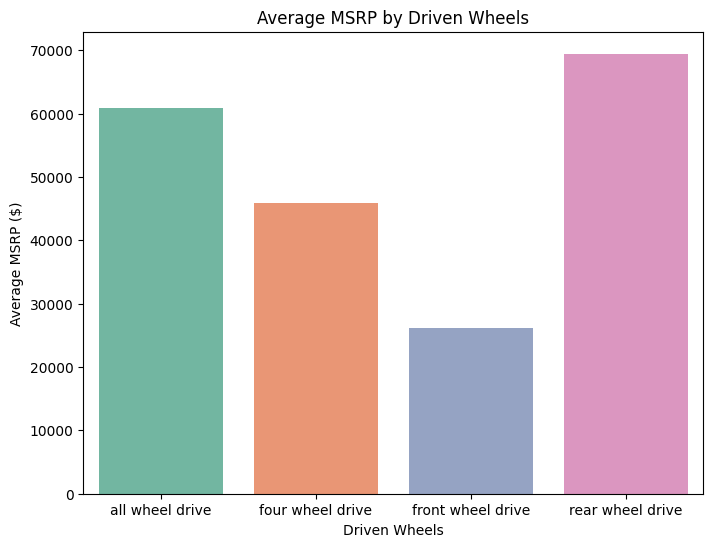

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recompute grouped data if needed
# group_driven_wheels = df_car.groupby('Driven_Wheels', as_index=False)['MSRP'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(data=group_driven_wheels, x='Driven_Wheels', y='MSRP', palette='Set2')
plt.title('Average MSRP by Driven Wheels')
plt.xlabel('Driven Wheels')
plt.ylabel('Average MSRP ($)')
plt.show()


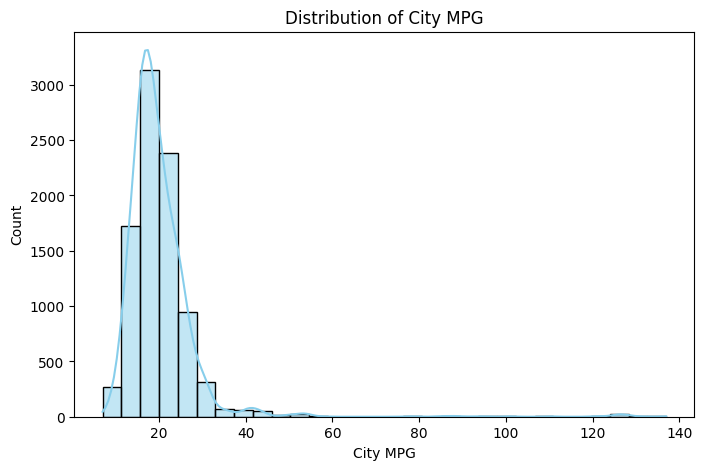

In [ ]:
# 3. Visualizations:
import matplotlib.pyplot as plt
import seaborn as sns

#Generate the following visualizations:
#A histogram that shows a distribution for the city mpg column.

plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned_filter['city mpg'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of City MPG")
plt.xlabel("City MPG")
plt.ylabel("Count")
plt.show()



/tmp/ipython-input-91-3773003547.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_msrp_by_size.index, y=avg_msrp_by_size.values, palette="Set1")


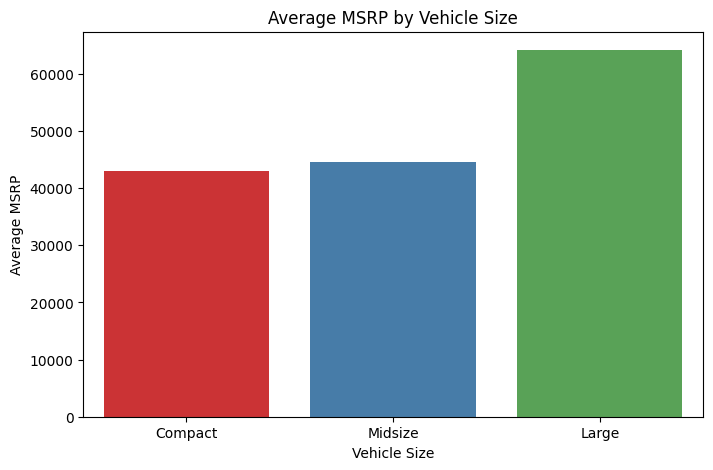

<Figure size 640x480 with 0 Axes>

In [ ]:
#A bar chart showing the average MSRP for each category in Vehicle Size.
plt.figure(figsize=(8, 5))
avg_msrp_by_size = df_cleaned_filter.groupby('Vehicle Size')['MSRP'].mean().sort_values()

sns.barplot(x=avg_msrp_by_size.index, y=avg_msrp_by_size.values, palette="Set1")
plt.title("Average MSRP by Vehicle Size")
plt.xlabel("Vehicle Size")
plt.ylabel("Average MSRP")
plt.show()
plt.savefig("Barplot Vehicle Size & Average MSRP.png")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


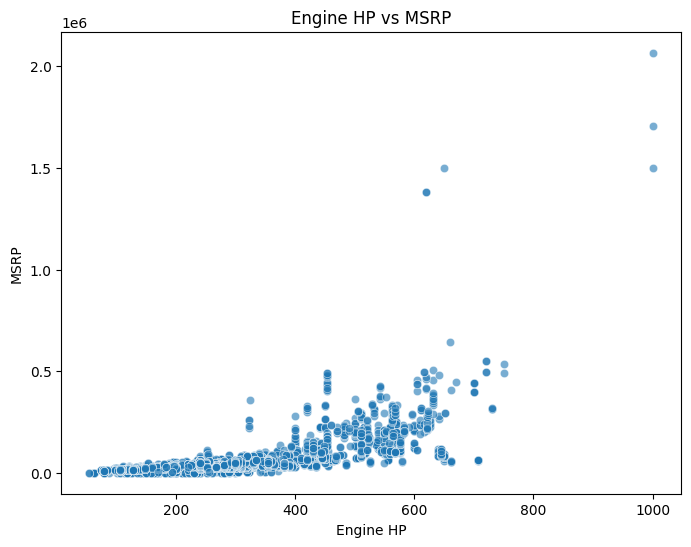

In [ ]:
#A scatter plot showing the relationship between Engine HP and MSRP.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned_filter, x='Engine HP', y='MSRP', alpha=0.6)
plt.title("Engine HP vs MSRP")
plt.xlabel("Engine HP")
plt.ylabel("MSRP")
plt.show()

/tmp/ipython-input-54-2835608782.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned_filter, x='Driven_Wheels', y='MSRP', palette="Set2")


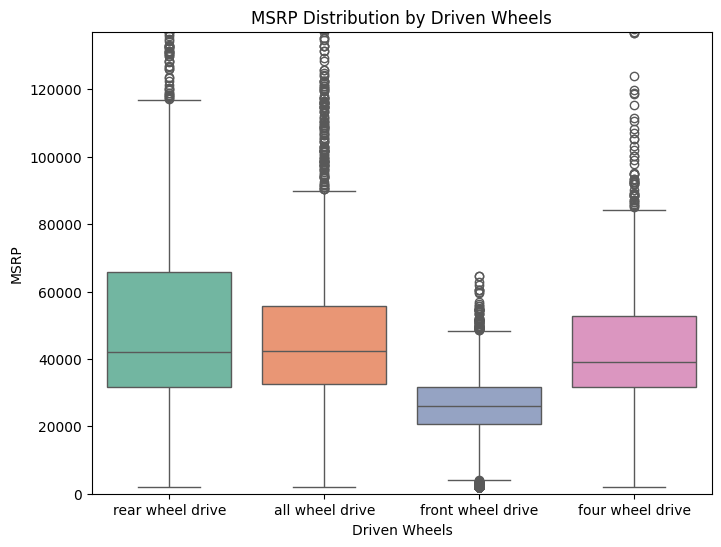

In [ ]:
#A boxplot showing the distribution of MSRP for each category in Driven_Wheels.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned_filter, x='Driven_Wheels', y='MSRP', palette="Set2")
plt.title("MSRP Distribution by Driven Wheels")
plt.xlabel("Driven Wheels")
plt.ylabel("MSRP")
plt.ylim(0, df_cleaned_filter['MSRP'].quantile(0.95))  # optional: limit extreme outliers
plt.show()

<Figure size 1000x600 with 0 Axes>

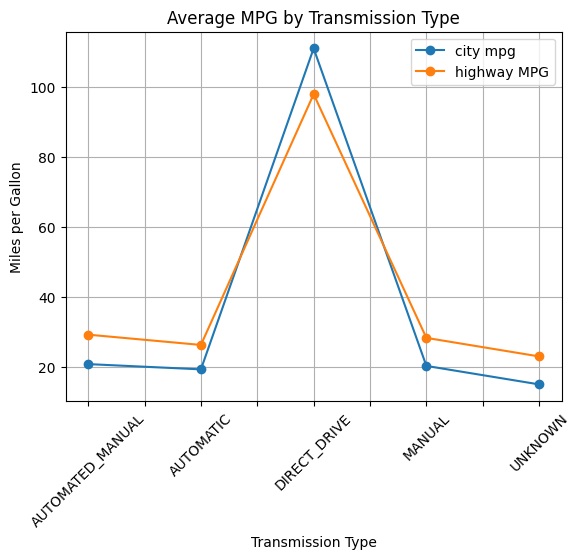

In [ ]:
#A line plot showing trends in average city mpg and highway MPG for different Transmission Type.
# Prepare data
avg_mpg_by_trans = df_cleaned_filter.groupby('Transmission Type')[['city mpg', 'highway MPG']].mean()

plt.figure(figsize=(10, 6))
avg_mpg_by_trans[['city mpg', 'highway MPG']].plot(kind='line', marker='o')

plt.title("Average MPG by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Miles per Gallon")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Correlation Matrix:
             Engine HP      MSRP  Popularity  city mpg  highway MPG
Engine HP     1.000000  0.646666    0.043923 -0.427668    -0.454618
MSRP          0.646666  1.000000   -0.051724 -0.207336    -0.227299
Popularity    0.043923 -0.051724    1.000000  0.028503     0.022584
city mpg     -0.427668 -0.207336    0.028503  1.000000     0.878669
highway MPG  -0.454618 -0.227299    0.022584  0.878669     1.000000


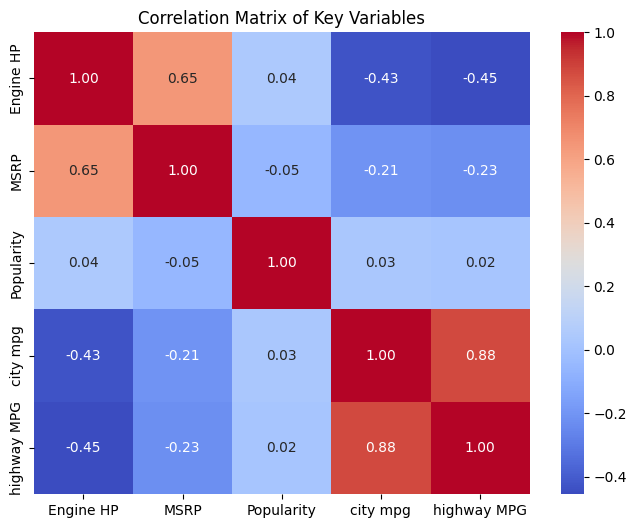

In [ ]:
# 4. Correlation Analyses
# Select relevant columns
corr_cols = ['Engine HP', 'MSRP', 'Popularity', 'city mpg', 'highway MPG']

# Compute correlation matrix
corr_matrix = df_cleaned_filter[corr_cols].corr()

print("Correlation Matrix:")
print(corr_matrix)

# Visualize as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Key Variables")
plt.show()


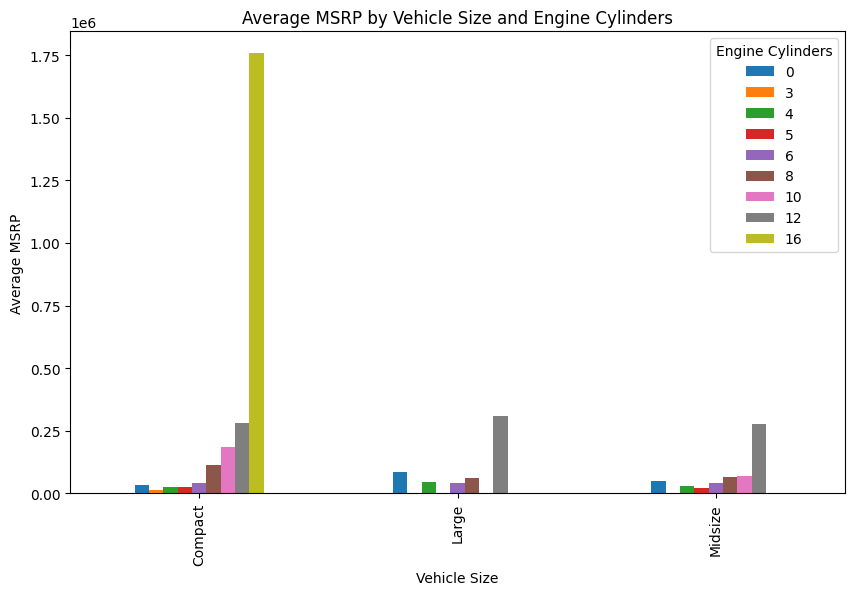

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: pivot table of average MSRP by Vehicle Size and Cylinders
pivot_table = df_cleaned_filter.pivot_table(index='Vehicle Size', columns='Engine Cylinders', values='MSRP', aggfunc='mean')

pivot_table.plot(kind='bar', figsize=(10,6))
plt.title('Average MSRP by Vehicle Size and Engine Cylinders')
plt.ylabel('Average MSRP')
plt.xlabel('Vehicle Size')
plt.legend(title='Engine Cylinders')
plt.show()


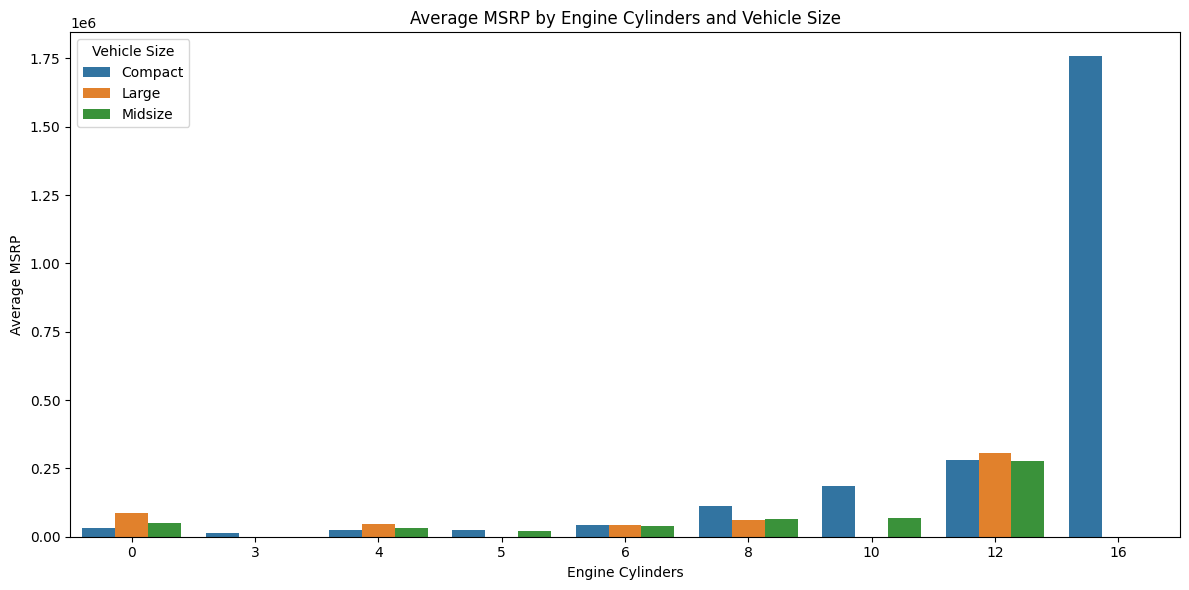

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Engine Cylinders and Vehicle Size, then compute average MSRP
grouped = df_cleaned_filter.groupby(['Engine Cylinders', 'Vehicle Size']).agg(
    avg_msrp=('MSRP', 'mean'),
    popularity=('Popularity', 'mean')
).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=grouped,
    x='Engine Cylinders',
    y='avg_msrp',
    hue='Vehicle Size'
)

plt.title("Average MSRP by Engine Cylinders and Vehicle Size")
plt.ylabel("Average MSRP")
plt.xlabel("Engine Cylinders")
plt.legend(title="Vehicle Size")
plt.tight_layout()
plt.show()


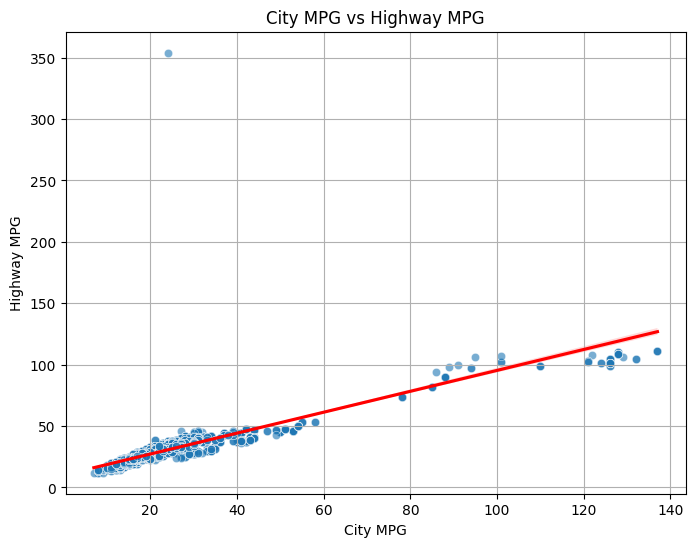

Correlation between City MPG and Highway MPG: 0.88


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cleaned_filter, x='city mpg', y='highway MPG', alpha=0.6)

# Add a regression line for better visualization of correlation
sns.regplot(data=df_cleaned_filter, x='city mpg', y='highway MPG', scatter=False, color='red')

plt.title('City MPG vs Highway MPG')
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.grid(True)
plt.show()

# Optional: Calculate correlation coefficient
corr = df_cleaned_filter['city mpg'].corr(df_cleaned_filter['highway MPG'])
print(f"Correlation between City MPG and Highway MPG: {corr:.2f}")


###**Summary Report**

**1. Pricing & Vehicle Characteristics**
Price patterns by vehicle size and drivetrain:
Larger vehicle sizes (SUV, full-size) show significantly higher average MSRP, consistent with their larger size, features, and market positioning (i.e., fullfilling consumer expectation). Similarly, AWD and RWD drivetrains have higher median prices and greater price variability than FWD, reflecting luxury/performance vehicle trends as these are usually less about cost-saving, but more about enhancing performance, safety and prestige (which naturally pushes prices higher.)

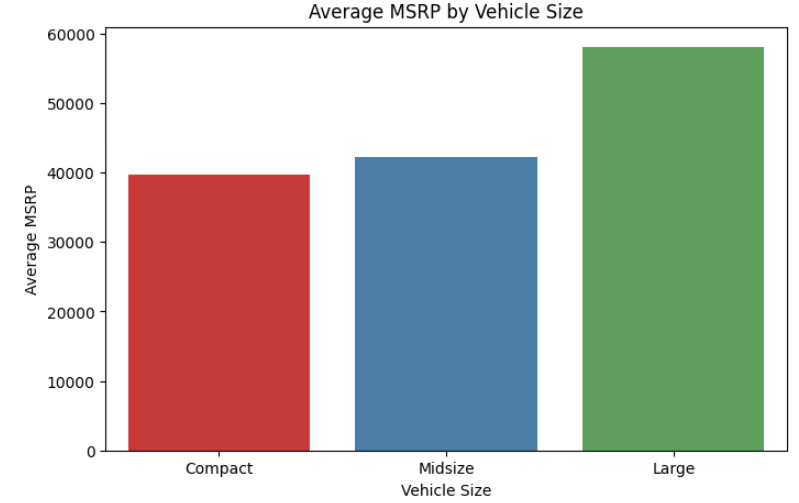

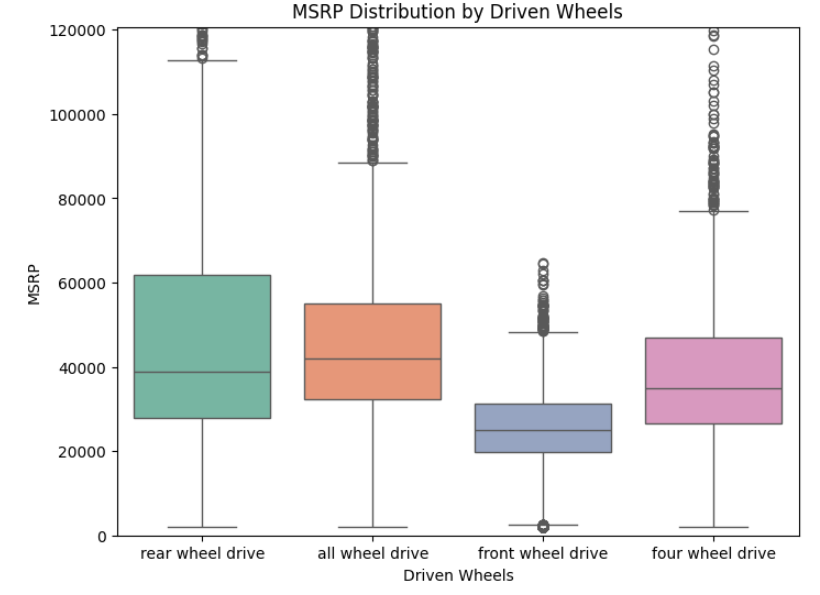


**Horsepower strongly influences price:**
The positive correlation (r ≈ +0.78) between Engine HP and MSRP confirms that vehicles with more powerful engines tend to be pricier, with outliers likely representing exotic or limited editions. The engineered feature Price per HP can be used to identify models that are “overpriced” or “underpowered” relative to their cost.

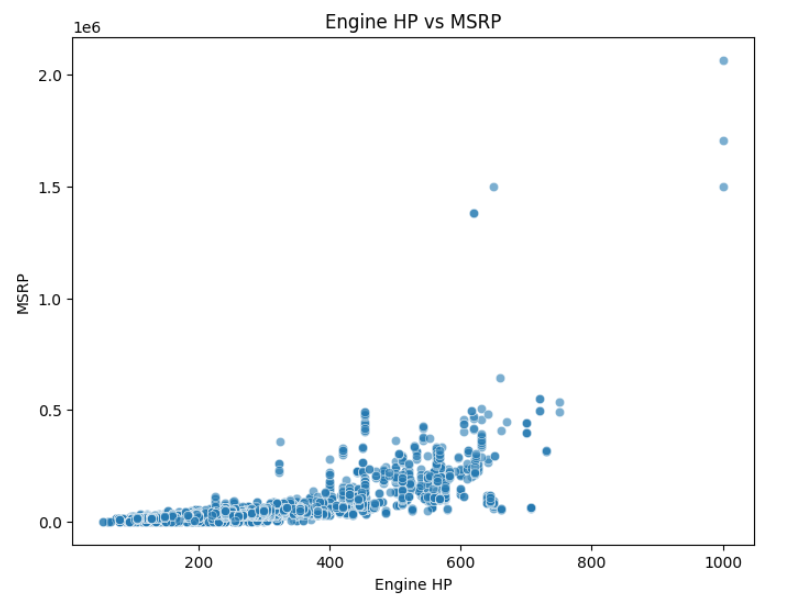

**Engine Cylinders and Vehicle Size as pricing indicators:**
Within each vehicle size, cars with more cylinders (8, 10, 12, 16) generally have much higher average MSRP. Extreme outliers appear, e.g., 16-cylinder compact cars (probably exotic supercars like Bugatti), causing a massive spike.
The expected trend that “large vehicles cost more” is less clear here, because engine cylinders dominate the pricing effect much more than size. Compact cars show huge variance because some ultra-expensive high-performance sports cars are technically compact but have 12–16 cylinders.Midsize and Large vehicles show a more stable price increase with cylinders but without crazy outlier.

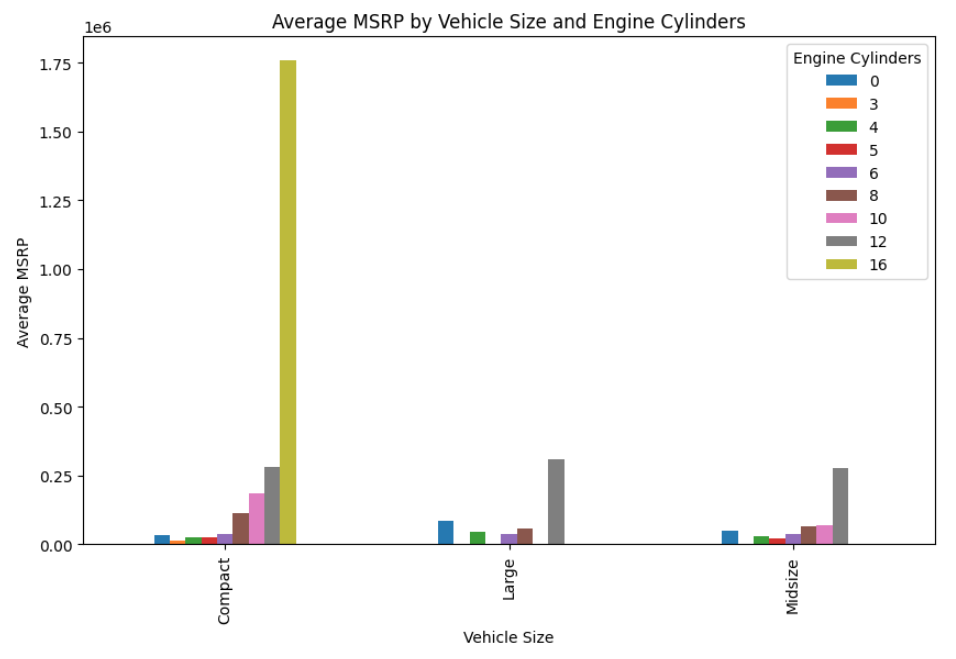


**2. Fuel Efficiency & Transmission**
City and highway MPG distribution:
Most vehicles cluster around moderate MPG values, with a tail of highly fuel-efficient vehicles (likely hybrids or small cars). The high positive correlation between city and highway MPG (r ≈ +0.88) indicates consistent efficiency across driving conditions.


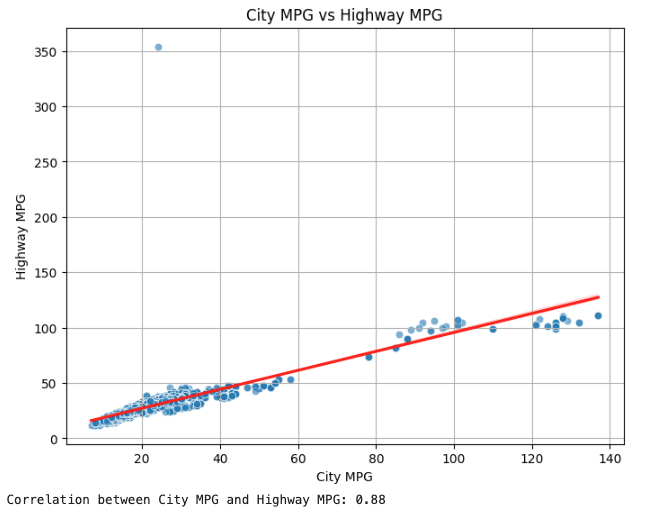



**Transmission type impacts MPG:**
For most transmission types (automated manual, automatic, and unknown), highway MPG is higher than city MPG, reflecting typical fuel efficiency at steady highway speeds. However, for direct drive, city MPG is slightly higher than highway MPG, possibly due to its unique gearing or use in specialized vehicles. This pattern shows that transmission design influences how efficiently a vehicle performs in different driving conditions.

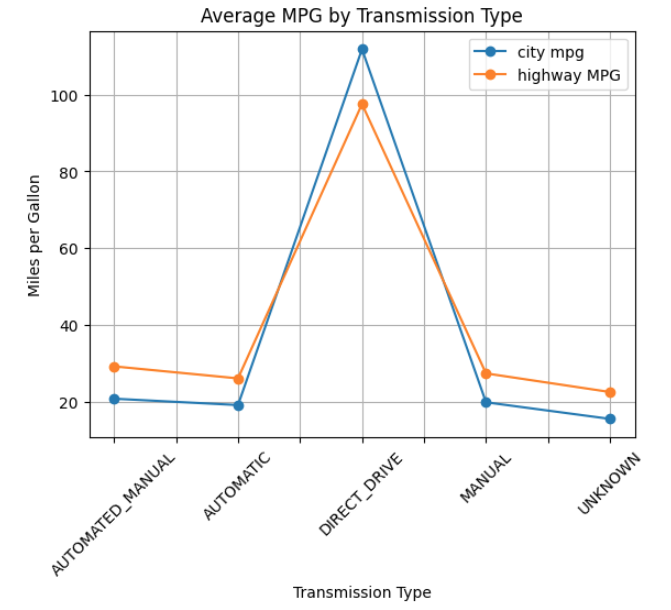


**Trade-off between power and efficiency:**
Engine HP correlates moderately negatively with both city and highway MPG, confirming the classic trade-off between performance and fuel efficiency. MSRP also shows a weaker negative correlation with MPG, suggesting that pricier vehicles tend to consume more fuel—though this effect is less pronounced, most likely due to the presence of high-priced fuel-efficient models (e.g., hybrids or EVs).


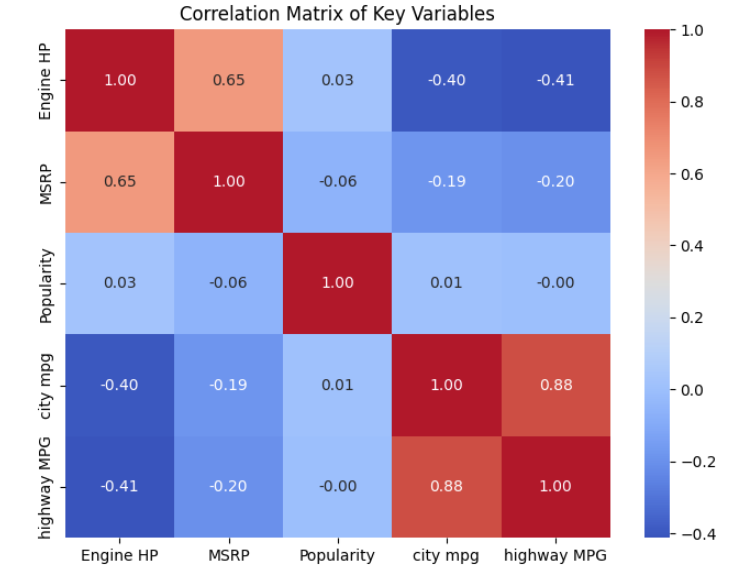

**3. Data Completeness and Cleaning Strategies**
Hierarchical imputation approach:
Your stepwise filling of missing Engine HP and Cylinders — starting with the most specific grouping (Make+Model+Year) and moving to broader groups (Engine Cylinders + Vehicle Size) — ensured maximal data retention while minimizing imputation bias.

**Market Category imputation via multi-output classification:**
Applying a Random Forest multi-label classifier to predict missing Market Category booleans leveraged the rich feature set well, preserving valuable categorical information.

**Number of Doors inconsistency handling:**
Despite attempts to predict missing Number of Doors based on Vehicle Style, Model, and other variables, the limited and inconsistent data led to dropping only 6 rows — a reasonable choice given the dataset size.

**4. Feature Engineering Insights**
Age and Total MPG:
Calculated vehicle Age (relative to 2025) allows temporal trend analyses and lifecycle cost modeling. The engineered Total MPG feature (mean of city and highway MPG) provides a single, comprehensive fuel efficiency metric simplifying analysis.

**Price per Horsepower metric:**
This ratio can help identify vehicles offering better value or those with a premium markup. Examining this alongside popularity and vehicle style could yield marketing or segmentation insights.

**5. Additional Observations**
Popularity trends:
Popularity averages by Driven Wheels and Engine Cylinders suggest consumer preferences, potentially favoring more versatile drivetrains and moderate engine sizes.

**Missing values well-managed:**
After cleaning, the dataset contains minimal missing data, enhancing model robustness and analytical reliability.

**Categorical standardization:**
Lowercasing key string columns like Vehicle Style and Market Category ensures consistency for downstream analysis and modeling.

